<a href="https://colab.research.google.com/github/oussamabartil/Forum-Page-web-Views-/blob/main/multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D  # Pour le graphe 3D
%matplotlib inline

# 1. Dataset
 Load the dataset


In [ ]:
dataset = pd.read_csv("Advertising.csv")
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Select the features and the target variable

In [ ]:
X = dataset[['TV', 'Radio', 'Newspaper']].values  # Use multiple features
y = dataset['Sales'].values.reshape(-1, 1)  # Reshape y to be a column vector

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (200, 3)
y shape: (200, 1)


# 2. Add the bias term to X

In [ ]:
X = np.hstack((X, np.ones((X.shape[0], 1))))  # Add a column of ones for the bias term
print(X.shape)
print(X[:10])

(200, 4)
[[230.1  37.8  69.2   1. ]
 [ 44.5  39.3  45.1   1. ]
 [ 17.2  45.9  69.3   1. ]
 [151.5  41.3  58.5   1. ]
 [180.8  10.8  58.4   1. ]
 [  8.7  48.9  75.    1. ]
 [ 57.5  32.8  23.5   1. ]
 [120.2  19.6  11.6   1. ]
 [  8.6   2.1   1.    1. ]
 [199.8   2.6  21.2   1. ]]


Split the dataset into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize parameters (theta)

In [ ]:
#initialisation du vecteur theta avec 4 element car le vect X a 4 colonnes
np.random.seed(4)  # For reproducibility
theta = np.random.randn(X_train.shape[1], 1)  # Random initialization
theta

array([[ 0.05056171],
       [ 0.49995133],
       [-0.99590893],
       [ 0.69359851]])

# 4. Model function

In [ ]:
def model(X, theta):
    return X.dot(theta)

# 5. Cost function: Mean Squared Error

erreur de modele seur X,y (quadratique moyenne)

In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [ ]:
cost_function(X,y,theta)

514.8256769767901

# 6. Gradient function

implementent la formule de gradiant pour la MSE

In [ ]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

# 7. Gradient descent function

In [ ]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
  #creation tab stockage pour enregestrer evolution du cout de modele
    cost_history = np.zeros(n_iterations)

    for i in range(n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)#mise a jour param theta
        cost_history[i] = cost_function(X, y, theta)

    return theta, cost_history

# 8. Train the model

In [ ]:
n_iterations = 10000
learning_rate = 0.00001
theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

theta_final

array([[0.05105661],
       [0.21155183],
       [0.01868993],
       [0.72935081]])

# 9. Visualization of cost function

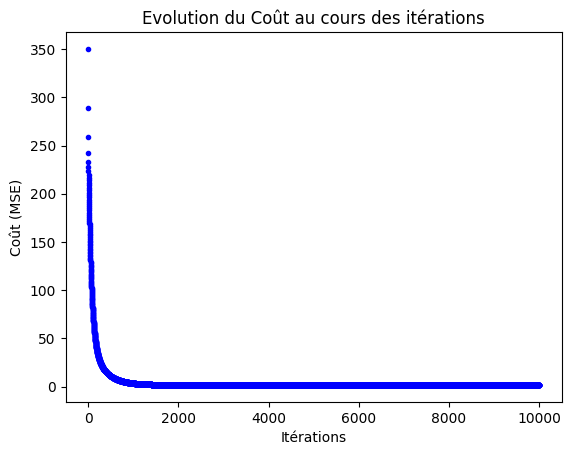

In [ ]:
plt.plot(range(n_iterations), cost_history, 'b.')
plt.title('Evolution du Coût au cours des itérations')
plt.xlabel('Itérations')
plt.ylabel('Coût (MSE)')
plt.show()

# 10. Predictions and evaluation on the test set

In [ ]:
y_pred = model(X_test, theta_final)

 Plot actual vs predicted sales

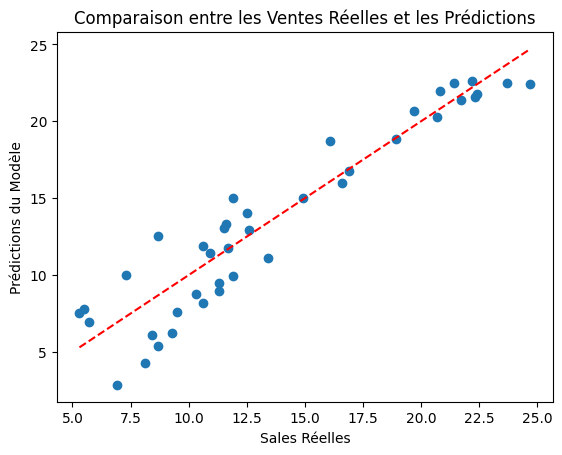

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Sales Réelles')
plt.ylabel('Prédictions du Modèle')
plt.title('Comparaison entre les Ventes Réelles et les Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect predictions
plt.show()

# 11. Calculer le coût sur le jeu de test

In [ ]:
test_cost = cost_function(X_test, y_test, theta_final)
print("Coût sur le jeu de test:", test_cost)

Coût sur le jeu de test: 1.979549187837818


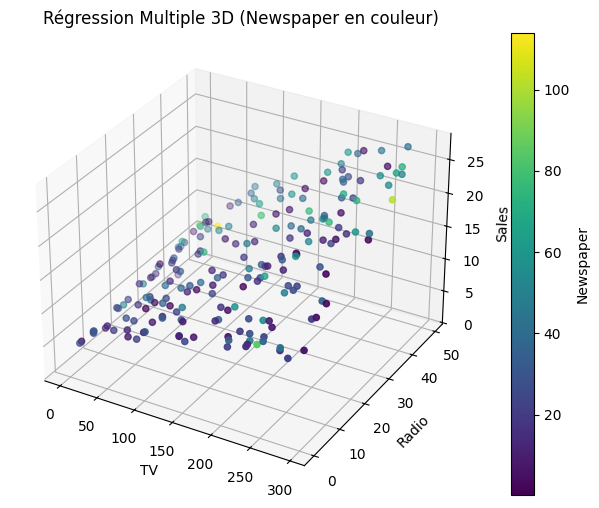

In [ ]:
# Valeur moyenne de Newspaper pour fixer une dimension
newspaper_mean = np.mean(dataset['Newspaper'])

# Filtrer les points pour affichage 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot des vraies valeurs
sc = ax.scatter(dataset['TV'], dataset['Radio'], dataset['Sales'], c=dataset['Newspaper'], cmap='viridis', marker='o')

# Labels et titre
ax.set_xlabel("TV")
ax.set_ylabel("Radio")
ax.set_zlabel("Sales")
ax.set_title("Régression Multiple 3D (Newspaper en couleur)")

# Ajouter une barre de couleur pour Newspaper
cbar = plt.colorbar(sc)
cbar.set_label('Newspaper')

plt.show()


affichage 3d avec juste les deux tv et radio

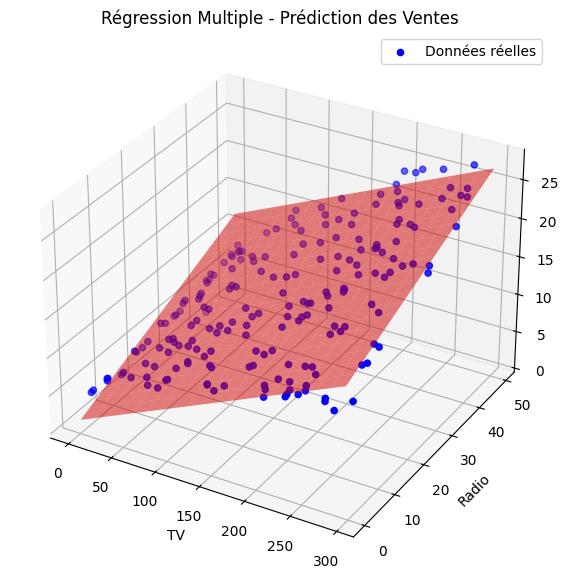

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataset["TV"], dataset["Radio"], dataset["Sales"], c='blue', marker='o', label="Données réelles")

# grille pour le plan de regression
tv_range = np.linspace(dataset["TV"].min(), dataset["TV"].max(), 20)
radio_range = np.linspace(dataset["Radio"].min(), dataset["Radio"].max(), 20)
tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)

# Fixer Newspaper à sa moyenne
newspaper_mean = dataset["Newspaper"].mean()

# calculer val de sales pour le plan
sales_pred = (theta_final[0] * tv_grid +
              theta_final[1] * radio_grid +
              theta_final[2] * newspaper_mean +
              theta_final[3])

# tracer plan de regression
ax.plot_surface(tv_grid, radio_grid, sales_pred, color='red', alpha=0.5)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.set_title('Régression Multiple - Prédiction des Ventes')

plt.legend()
plt.show()